# Import Packages

In [23]:
%matplotlib inline
import geopandas as gpd
from matplotlib import pyplot as plt
from sqlalchemy import create_engine
import pandas as pd
import numpy as np

# Import SQL file

In [24]:
engine = create_engine("postgresql:///opportunity_youth")
table_oy = pd.read_sql('final_table', index_col=int, con=engine)
original = pd.read_csv('original.csv')

# Reorganize Data

In [25]:
shift = table_oy.copy()
for i in range (0, 3):
    temp1 = table_oy.loc[(i * 3) + 1].copy()
    temp2 = table_oy.loc[(i * 3) + 2].copy()
    shift.loc[(i * 3) + 1] = temp2
    shift.loc[(i * 3) + 2] = temp1
temp6 = table_oy.loc[6].copy()
temp8 = table_oy.loc[8].copy()
temp7 = table_oy.loc[7].copy()
shift.iloc[6] = temp8
shift.iloc[8] = temp6
shift.iloc[7] = temp7

# Plot Data Relate to Number of Opportunity Youth

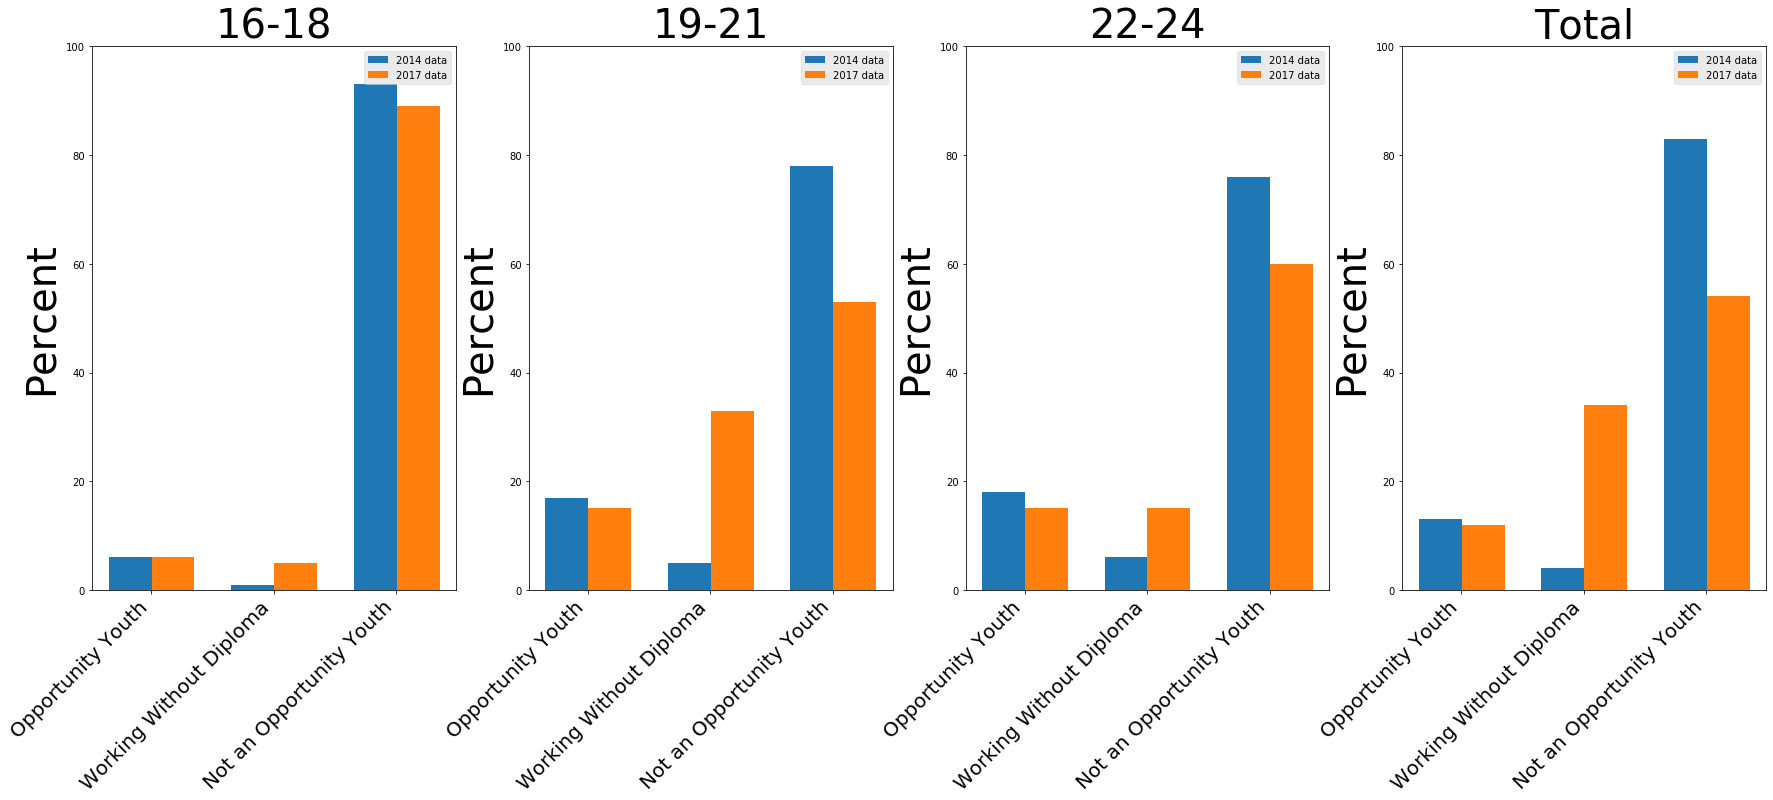

In [16]:
n_groups = 3
fig, ax = plt.subplots(1, 4, figsize = (30, 10))
#fig1, ax1 = plt.subplots(1, 3, figsize = (30, 10))
plt.style.use('ggplot')
index = np.arange(n_groups)
width = 0.35
#plt.xticks(index + width / 2,('Opportunity Youth', 'Working Without Diploma', 'Not an Opportunity Youth'))
plt.setp(ax, xticks = [0.1725, 1.1725, 2.1725],
         xticklabels=['Opportunity Youth', 'Working Without Diploma', 'Not an Opportunity Youth'])

for i in range(0, 4):
    old = []
    new = []
    change = []
    if (i < 3):    
        ax[i].set_title(original['age_group'].iloc[i * 3], fontsize = 40)
        for j in range (0, 3):
            old.append(original['percent'].iloc[(i * 3) + j])
            new.append(shift['percent'].iloc[(i * 3) + j])
    else:
        ax[i].set_title('Total', fontsize = 40)
    if (i == 3):
        old = [13, 4, 83]
        new = [12 ,34, 54]
    ax[i].bar(index, old, width, label = '2014 data')
    ax[i].bar(index + width, new, width, label = '2017 data')
    ax[i].legend()
    ax[i].set_xlabel
    ax[i].set_ylabel('Percent', fontsize = 40)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize = 20)
    ax[i].set_yticks([0, 20, 40, 60, 80, 100])

,estimated_people,percent,opportunity_youth
0,53859.0,54.0,not_an_opportunity_youth
1,12031.0,12.0,opportunity_youth
2,33814.0,34.0,working_without_diploma
